In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet
from random import *
from sklearn.cluster import KMeans
from datetime import datetime


# Transforming data to DateTime and resample

In [2]:
d = []
for i in range(10):
    d.append(randint(1, 15226)) 
d

[5419, 14687, 11201, 12772, 11728, 13934, 7001, 3321, 4079, 4554]

In [33]:
#list of prices
prices_str = ['C:/ICUP/InformatiCup2018-master/Eingabedaten/Benzinpreise/6176.csv',
             'C:/ICUP/InformatiCup2018-master/Eingabedaten/Benzinpreise/13214.csv',
             'C:/ICUP/InformatiCup2018-master/Eingabedaten/Benzinpreise/13619.csv',
             'C:/ICUP/InformatiCup2018-master/Eingabedaten/Benzinpreise/823.csv',
             'C:/ICUP/InformatiCup2018-master/Eingabedaten/Benzinpreise/9132.csv',
             'C:/ICUP/InformatiCup2018-master/Eingabedaten/Benzinpreise/8232.csv',
             'C:/ICUP/InformatiCup2018-master/Eingabedaten/Benzinpreise/12711.csv',
             'C:/ICUP/InformatiCup2018-master/Eingabedaten/Benzinpreise/8501.csv',
             'C:/ICUP/InformatiCup2018-master/Eingabedaten/Benzinpreise/12297.csv',
             'C:/ICUP/InformatiCup2018-master/Eingabedaten/Benzinpreise/5789.csv']

In [102]:
def all_prices():
    prices = pd.read_csv(prices_str[0], header = None, delimiter = ';', index_col=0, names = str(0))
    for i in range(1,len(prices_str)):
        temp = pd.read_csv(prices_str[i], header = None, delimiter = ';', index_col=0, names = str(i))
        prices = prices.append(temp)
    index = pd.DatetimeIndex(prices.index)
    prices.set_index(index, inplace = True)
    prices = prices.resample('H').mean()
    return prices

In [111]:
def create_model(x,i):
    m = Prophet(yearly_seasonality=False, holidays = pd.concat((hol(ds), wee(ds2))))
    print('ts {} is being fit'.format(i))
    m.fit(x)
    f = m.predict(x)
    return f

In [98]:
ds = pd.DatetimeIndex(['2016-01-01', '2016-01-06', '2016-02-08', '2016-03-25',
                       '2016-03-28', '2016-05-01', '2016-05-05', '2016-05-08',
                       '2016-05-16', '2016-05-26', '2016-08-15', '2016-09-17',
                       '2016-10-03', '2016-10-31', '2016-11-01', '2016-11-16',
                       '2016-12-25', '2016-12-26', '2017-01-01', '2017-01-06',
                       '2017-02-27', '2017-04-14', '2017-04-17', '2017-05-01',
                       '2017-05-14', '2017-05-25', '2017-06-05', '2017-06-15', 
                       '2017-08-15', '2017-09-16', '2017-10-03', '2017-10-31',
                       '2017-11-01', '2017-11-22', '2017-12-25', '2017-12-26'])

In [103]:
ds2 = pd.DatetimeIndex(all_prices().loc[all_prices().index.dayofweek >= 5].index)

In [105]:
def hol(b):
    rng=[]
    for i in b:
        rng.extend(pd.date_range(i, periods=24, freq='H'))
    df = pd.DataFrame({
        'holiday': 'all holidays',
         'ds': rng
    })
    return df        

In [106]:
def wee(b):
    df = pd.DataFrame({
        'holiday': 'weekends',
        'ds': b
        
    })
    return df

In [126]:
def predicts(prices):
    filled_prices = pd.DataFrame(index = prices.index)
    for i in range(len(prices.columns)):
        renamed = pd.DataFrame(data = prices[str(i)], index = prices.index)
        renamed.reset_index(inplace = True)
        renamed.rename(columns = {'index': 'ds', str(i): 'y'}, inplace = True)
        filled_prices = filled_prices.assign(x = create_model(renamed,i)['yhat'].values)
        print('mse for ts {}: {}'.format(i, mean_squared_error(np.log(renamed.y.dropna()),
                                 np.log(filled_prices['x'].loc[filled_prices.index.isin(renamed.ds[~renamed.y.isnull()])]))))
        filled_prices.rename(columns = {'x': str(i)}, inplace = True)
    return filled_prices

In [125]:
allp = predicts(all_prices()['2016':'2017'])

ts 0 is being fit


KeyboardInterrupt: 

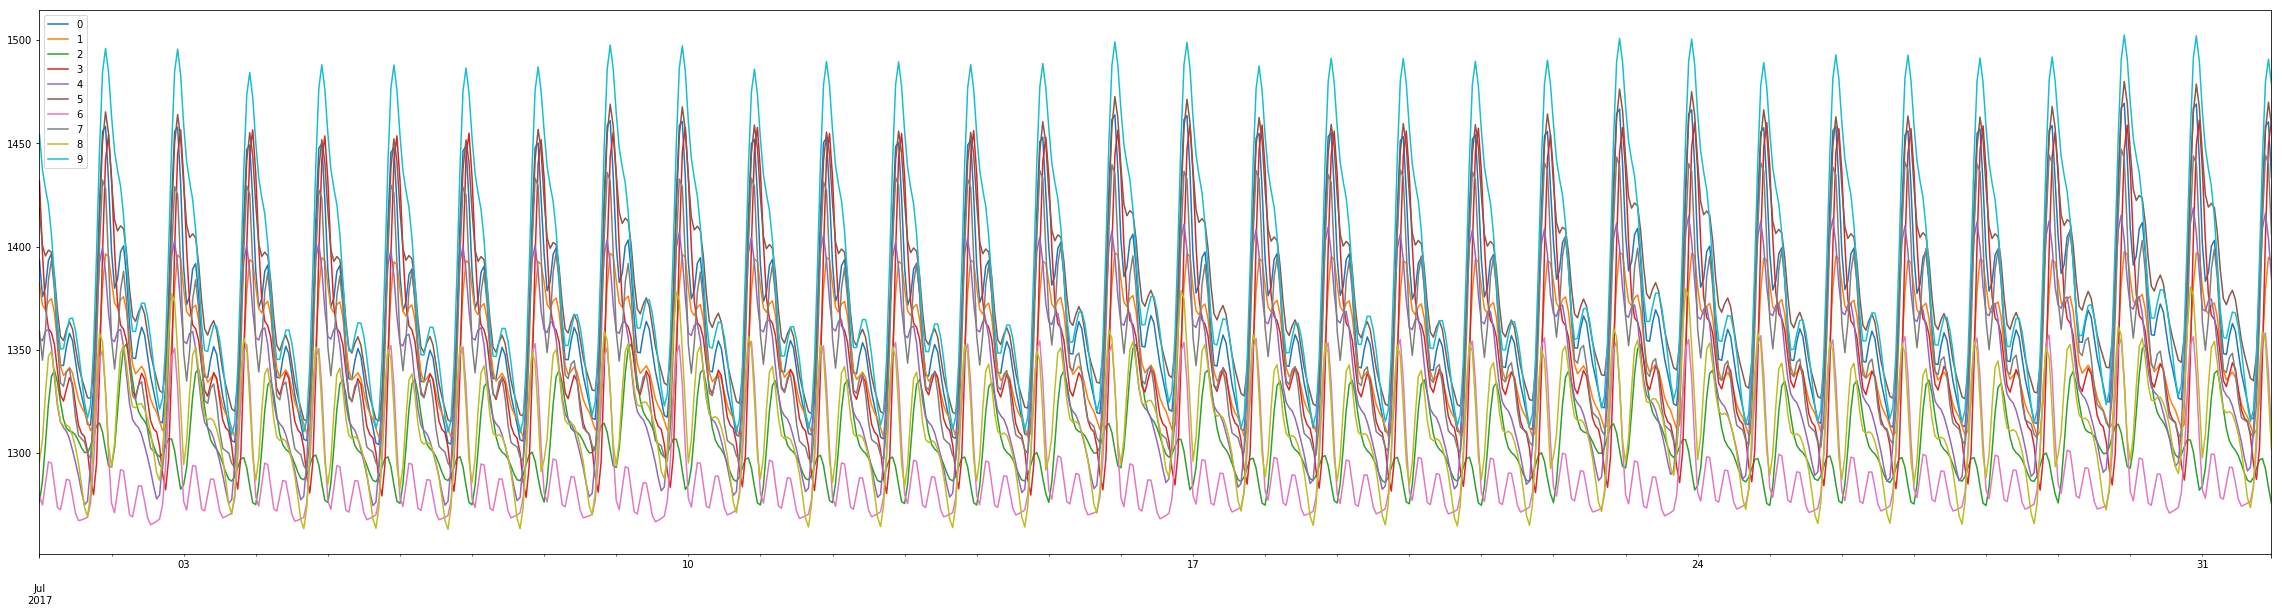

In [120]:
allp['2017-07'].plot(figsize = (40,10))
plt.show()

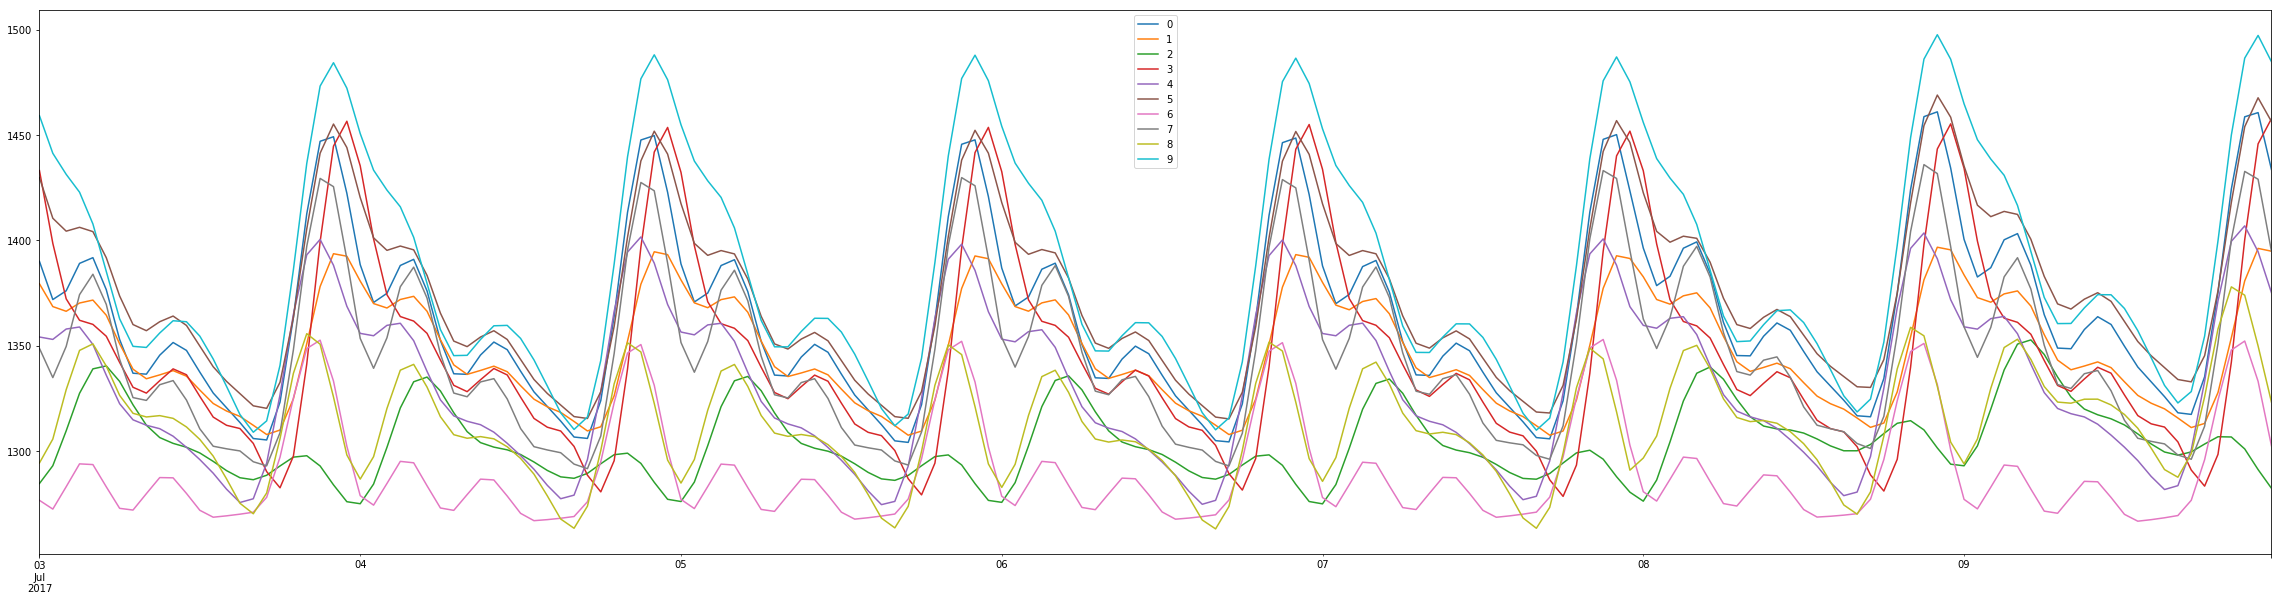

In [116]:
allp['2017-07-03':'2017-07-09'].plot(figsize = (40,10))
plt.show()

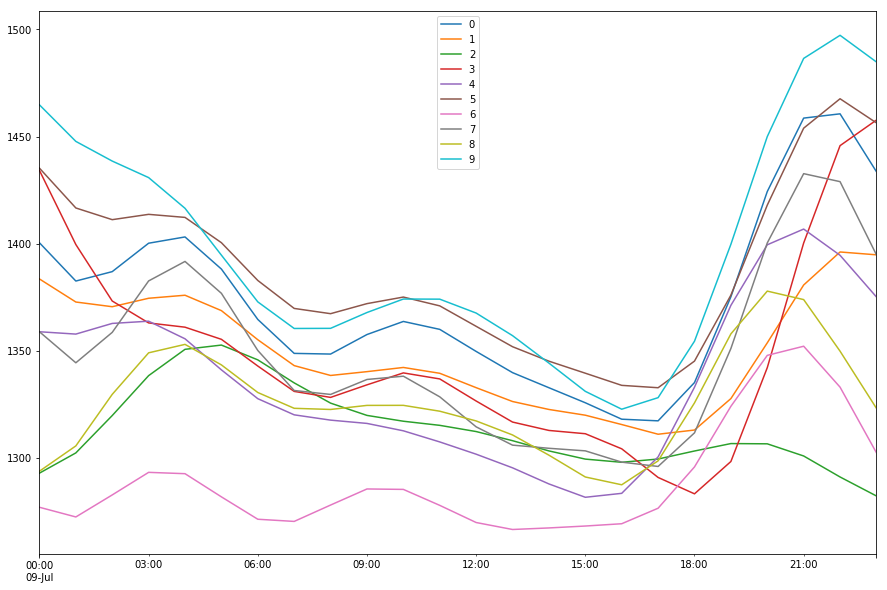

In [117]:
allp['2017-07-09'].plot(figsize = (15,10))
plt.show()

## comparing predictions with and without holidays 
(will substitute copies with actual lists if needed for further tests)

In [121]:
#just copied results from "prophet (all days)"
no_s = [
 0.00028586568477133924,

 0.0002632170439121297,

0.00014994284823000636,

 0.0003352590772819091,

 0.0003185034774062317,

0.00022787475776818827,

 0.00016577370497478666,

 0.0003107461748176027,

 0.00032493034740883404,
 0.00042079590410429004]

In [122]:
#copied results from above
s = [
0.0002836109711326349,
 0.000261601779563133,
 0.0001478697067453124,
 0.0003353690585454444,
 0.00031778075555303126,
 0.00022615617954804796,
 0.00016602135603276835,
0.0003103235538799553,
0.0003197081609498024,
    0.00042075840545697526
]

In [123]:
for i in range(0,len(s)):
    if s[i] < no_s[i]:
        print('model with added holidays for ts {} is better'.format(i))
    else:
        print('nodel without added holidays for ts {} is better'.format(i))

model with added holidays for ts 0 is better
model with added holidays for ts 1 is better
model with added holidays for ts 2 is better
nodel without added holidays for ts 3 is better
model with added holidays for ts 4 is better
model with added holidays for ts 5 is better
nodel without added holidays for ts 6 is better
model with added holidays for ts 7 is better
model with added holidays for ts 8 is better
model with added holidays for ts 9 is better
